In [14]:
# Lucro por quilo de cada tipo de alimento
lucro_por_tipo = {
    "Tomate": 2.00,
    "Alface": 1.50
}

# Demanda de recursos por quilo de cada tipo de alimento
# Agora, removemos o 'tempo_cuidado' e ajustamos as quantidades de água e espaço
demanda_por_tipo = {
    "Tomate": {"agua": 3, "espaco": 2},
    "Alface": {"agua": 2, "espaco": 3}
}

# Disponibilidade total de recursos na fazenda
disponibilidade_recursos = {
    "agua": 5900,
    "espaco": 5400
}

In [15]:
# Cálculo do máximo que pode ser produzido para cada tipo de vegetal
max_tomate = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Tomate"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Tomate"]["espaco"]
)

max_alface = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Alface"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Alface"]["espaco"]
)

In [8]:
def calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface):
	# Calcula o uso total de água e espaço para as quantidades escolhidas de tomate e alface
	uso_agua = qtd_tomate * demanda_por_tipo["Tomate"]["agua"] + qtd_alface * demanda_por_tipo["Alface"]["agua"]
	uso_espaco = qtd_tomate * demanda_por_tipo["Tomate"]["espaco"] + qtd_alface * demanda_por_tipo["Alface"]["espaco"]

	restricoes = {"agua": uso_agua, "espaco": uso_espaco, "diversificacao": (qtd_alface, qtd_tomate)}

	# Verifica se a combinação de produção viola as restrições de recursos e diversificação
	viola_restricoes = uso_agua > disponibilidade_recursos["agua"] or uso_espaco > disponibilidade_recursos["espaco"] or qtd_tomate < 10/100*qtd_alface
	
	# Calcula o lucro total
	lucro = qtd_tomate * lucro_por_tipo["Tomate"] + qtd_alface * lucro_por_tipo["Alface"]

	return lucro, viola_restricoes, restricoes


In [10]:
calcular_lucro_e_viabilidade(10, 5)

(27.5, False, {'agua': 40, 'espaco': 35, 'diversificacao': (5, 10)})

In [16]:
# Testa todas as combinações possíveis de produção de tomate e alface
lista_solucoes = []

for qtd_tomate in range(0, int(max_tomate) + 1, 100):
	for qtd_alface in range(0, int(max_alface) + 1, 100):
		lucro, viola_restricoes, restricoes = calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface)
		lista_solucoes.append([qtd_tomate, qtd_alface, lucro, viola_restricoes, restricoes])
	
		if not viola_restricoes:
			print(f"Tomate: {qtd_tomate} kg, Alface: {qtd_alface} kg, Lucro: R$ {lucro:.2f}")

Tomate: 0 kg, Alface: 0 kg, Lucro: R$ 0.00
Tomate: 100 kg, Alface: 0 kg, Lucro: R$ 200.00
Tomate: 100 kg, Alface: 100 kg, Lucro: R$ 350.00
Tomate: 100 kg, Alface: 200 kg, Lucro: R$ 500.00
Tomate: 100 kg, Alface: 300 kg, Lucro: R$ 650.00
Tomate: 100 kg, Alface: 400 kg, Lucro: R$ 800.00
Tomate: 100 kg, Alface: 500 kg, Lucro: R$ 950.00
Tomate: 100 kg, Alface: 600 kg, Lucro: R$ 1100.00
Tomate: 100 kg, Alface: 700 kg, Lucro: R$ 1250.00
Tomate: 100 kg, Alface: 800 kg, Lucro: R$ 1400.00
Tomate: 100 kg, Alface: 900 kg, Lucro: R$ 1550.00
Tomate: 100 kg, Alface: 1000 kg, Lucro: R$ 1700.00
Tomate: 200 kg, Alface: 0 kg, Lucro: R$ 400.00
Tomate: 200 kg, Alface: 100 kg, Lucro: R$ 550.00
Tomate: 200 kg, Alface: 200 kg, Lucro: R$ 700.00
Tomate: 200 kg, Alface: 300 kg, Lucro: R$ 850.00
Tomate: 200 kg, Alface: 400 kg, Lucro: R$ 1000.00
Tomate: 200 kg, Alface: 500 kg, Lucro: R$ 1150.00
Tomate: 200 kg, Alface: 600 kg, Lucro: R$ 1300.00
Tomate: 200 kg, Alface: 700 kg, Lucro: R$ 1450.00
Tomate: 200 kg, Alfa

In [18]:
import pandas as pd

In [21]:
df = pd.DataFrame(
	lista_solucoes,
	columns=["qtd_tomate", "qtd_alface", "lucro", "viola_restricoes", "restricoes"]
)
df

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
1,0,100,150.0,True,"{'agua': 200, 'espaco': 300, 'diversificacao':..."
2,0,200,300.0,True,"{'agua': 400, 'espaco': 600, 'diversificacao':..."
3,0,300,450.0,True,"{'agua': 600, 'espaco': 900, 'diversificacao':..."
4,0,400,600.0,True,"{'agua': 800, 'espaco': 1200, 'diversificacao'..."
...,...,...,...,...,...
375,1900,1400,5900.0,True,"{'agua': 8500, 'espaco': 8000, 'diversificacao..."
376,1900,1500,6050.0,True,"{'agua': 8700, 'espaco': 8300, 'diversificacao..."
377,1900,1600,6200.0,True,"{'agua': 8900, 'espaco': 8600, 'diversificacao..."
378,1900,1700,6350.0,True,"{'agua': 9100, 'espaco': 8900, 'diversificacao..."


In [23]:
df.query("viola_restricoes==False")

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
19,100,0,200.0,False,"{'agua': 300, 'espaco': 200, 'diversificacao':..."
20,100,100,350.0,False,"{'agua': 500, 'espaco': 500, 'diversificacao':..."
21,100,200,500.0,False,"{'agua': 700, 'espaco': 800, 'diversificacao':..."
22,100,300,650.0,False,"{'agua': 900, 'espaco': 1100, 'diversificacao'..."
...,...,...,...,...,...
342,1800,0,3600.0,False,"{'agua': 5400, 'espaco': 3600, 'diversificacao..."
343,1800,100,3750.0,False,"{'agua': 5600, 'espaco': 3900, 'diversificacao..."
344,1800,200,3900.0,False,"{'agua': 5800, 'espaco': 4200, 'diversificacao..."
361,1900,0,3800.0,False,"{'agua': 5700, 'espaco': 3800, 'diversificacao..."


In [25]:
row_index = df.query("viola_restricoes == False")["lucro"].idxmax()
df.loc[row_index]

qtd_tomate                                                       1500
qtd_alface                                                        700
lucro                                                          4050.0
viola_restricoes                                                False
restricoes          {'agua': 5900, 'espaco': 5100, 'diversificacao...
Name: 292, dtype: object

In [27]:
import matplotlib.pyplot as plt
import numpy as np 

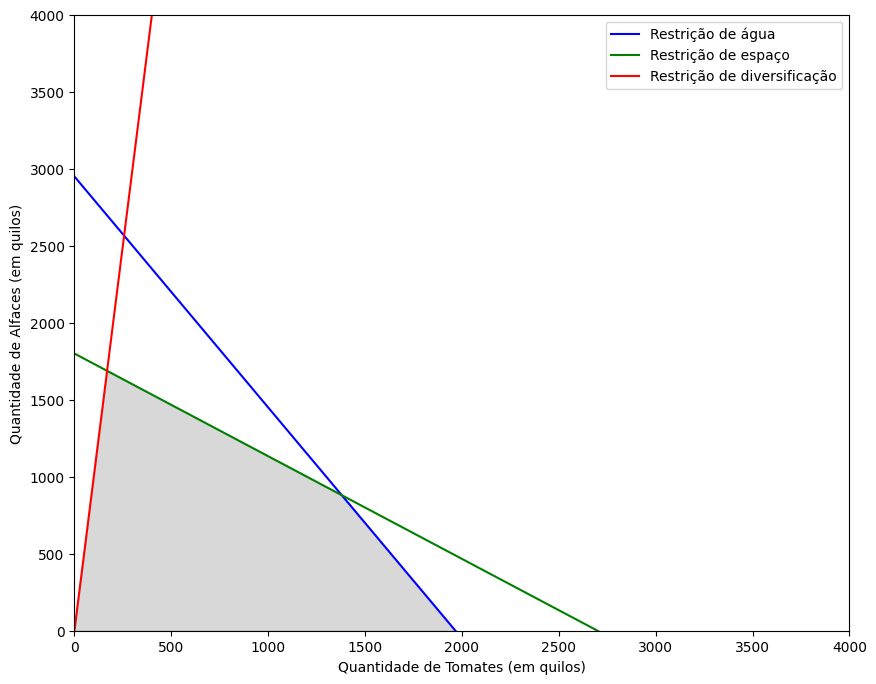

In [28]:
x_max = 4000
y_max = 4000

x = np.linspace(0, x_max, 400)
y = np.linspace(0, y_max, 400)

y1 = (5900 - 3*x) / 2  
y2 = (5400 - 2*x) / 3   
y3 = 10*x

plt.figure(figsize=(10,8))

plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

plt.plot(x,y1,color='b',label='Restrição de água')
plt.plot(x,y2,color='g',label='Restrição de espaço')
plt.plot(x,y3,color='r',label='Restrição de diversificação')

plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

plt.legend()
plt.show()

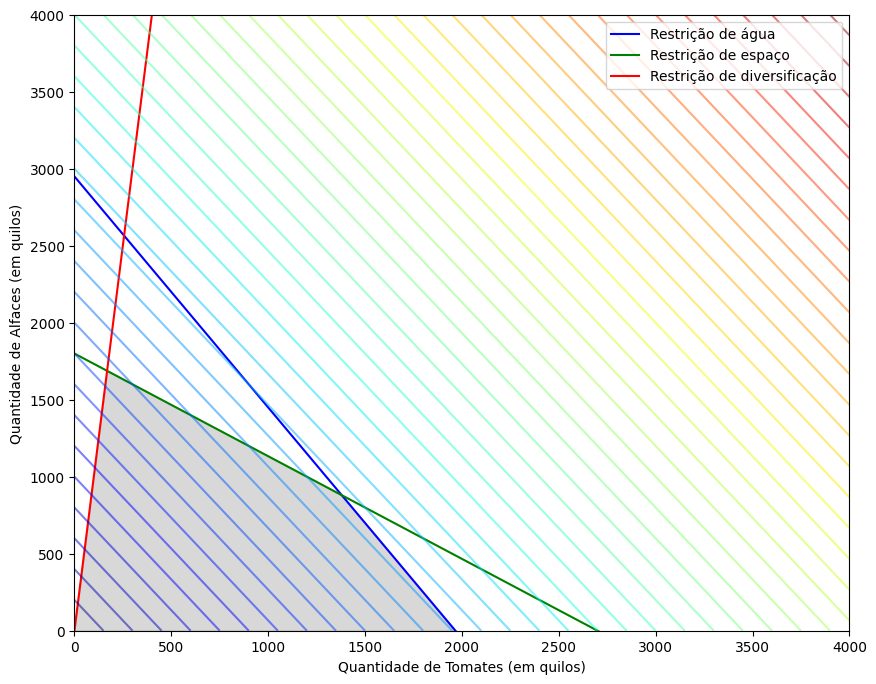

In [29]:
plt.figure(figsize=(10,8))

plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

plt.plot(x,y1,color='b',label='Restrição de água')
plt.plot(x,y2,color='g',label='Restrição de espaço')
plt.plot(x,y3,color='r',label='Restrição de diversificação')

X, Y = np.meshgrid(x, y)
Z = 2*X + 1.5*Y

plt.contour(X, Y, Z, 50, alpha=0.5, cmap='jet')

plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

plt.legend()
plt.show()

In [30]:
!pip install pyomo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 5.3 MB/s eta 0:00:00a 0:00:01


In [31]:
import pyomo.environ as pyo

In [32]:
modelo = pyo.ConcreteModel()

# Definindo as variáveis de decisão
modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

# Definindo a função objetivo
modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)

# Adicionando as restrições
modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 6000)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5500)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)

In [33]:
# Resolvendo o modelo
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpbox03sst.glpk.raw --wglp /tmp/tmpc752sevr.glpk.glp --cpxlp
 /tmp/tmpvgvewqiy.pyomo.lp
Reading problem data from '/tmp/tmpvgvewqiy.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpc752sevr.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   4.150000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpbox03sst.glpk.raw'...
14 lines were written


In [34]:
modelo.x_tomate.display()
modelo.x_alface.display()

x_tomate : Size=1, Index=None
    Key  : Lower : Value  : Upper : Fixed : Stale : Domain
    None :     0 : 1400.0 :  None : False : False : NonNegativeReals
x_alface : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 : 900.0 :  None : False : False : NonNegativeReals


In [35]:
# Imprimindo a solução
print(f"Quantidade de Tomate: {pyo.value(modelo.x_tomate)} kg")
print(f"Quantidade de Alface: {pyo.value(modelo.x_alface)} kg")
print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")

Quantidade de Tomate: 1400.0 kg
Quantidade de Alface: 900.0 kg
Lucro total: R$ 4150.0


In [36]:
alimentos = ['Tomate', 'Alface', 'Cenoura', 'Batata']
recursos = ['agua', 'espaco']

lucro_por_alimento = {'Tomate': 2.00, 'Alface': 1.50, 'Cenoura': 1.80, 'Batata': 1.20}

demanda_por_alimento = {
	'Tomate': {'agua': 3, 'espaco': 2},
	'Alface': {'agua': 2, 'espaco': 1},
	'Cenoura': {'agua': 4, 'espaco': 3},
	'Batata': {'agua': 5, 'espaco': 2.5}
}

disponibilidade_recursos = {'agua': 20000, 'espaco': 10000}

# Modelo
modelo = pyo.ConcreteModel()

# Variáveis de decisão
modelo.x = pyo.Var(alimentos, domain=pyo.NonNegativeReals)

# Função objetivo
modelo.lucro = pyo.Objective(expr=sum(lucro_por_alimento[i] * modelo.x[i] for i in alimentos), sense=pyo.maximize)

# Restrições
for r in recursos:
	modelo.add_component(f'restricao_{r}',
												pyo.Constraint(expr=sum(demanda_por_alimento[i][r] * modelo.x[i] for i in alimentos) <= disponibilidade_recursos[r])) 
	
# Resolver o modelo
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpqc8tgrfa.glpk.raw --wglp /tmp/tmp6zsrdttg.glpk.glp --cpxlp
 /tmp/tmpg_h6hh3s.pyomo.lp
Reading problem data from '/tmp/tmpg_h6hh3s.pyomo.lp'...
2 rows, 4 columns, 8 non-zeros
31 lines were read
Writing problem data to '/tmp/tmp6zsrdttg.glpk.glp'...
23 lines were written
GLPK Simplex Optimizer 5.0
2 rows, 4 columns, 8 non-zeros
Preprocessing...
2 rows, 4 columns, 8 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (4)
*     3: obj =   1.500000000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpqc8tgrfa.glpk.raw'...
15 lines were written


In [37]:
# Imprimir resultados
for alimento in alimentos:
	print(f"Produção de {alimento}: {pyo.value(modelo.x[alimento])} kg")

Produção de Tomate: 0.0 kg
Produção de Alface: 10000.0 kg
Produção de Cenoura: 0.0 kg
Produção de Batata: 0.0 kg


In [41]:
# Modelo
modelo = pyo.ConcreteModel()

modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)

modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 5900)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5400)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)

solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)
print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmptaz3r2xe.glpk.raw --wglp /tmp/tmpqwinm1s2.glpk.glp --cpxlp
 /tmp/tmpz0h21osl.pyomo.lp
Reading problem data from '/tmp/tmpz0h21osl.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpqwinm1s2.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   4.080000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmptaz3r2xe.glpk.raw'...
14 lines were written
Lucro total: R$ 4080.0


In [42]:
agua_folga = modelo.restricao_agua.slack()
agua_folga

0.0

In [43]:
espaco_folga = modelo.restricao_espaco.slack()
espaco_folga

0.0

In [44]:
diversificacao_folga = modelo.restricao_diversificacao.slack()
diversificacao_folga

1292.0

In [51]:
solver = pyo.SolverFactory('glpk')

def criar_modelo(coef_tomate):
	modelo = pyo.ConcreteModel()
	
	modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
	modelo.x_alface = pyo.Var (domain=pyo.NonNegativeReals)
	
	modelo.lucro = pyo.Objective(expr=coef_tomate*modelo.x_tomate+1.5*modelo.x_alface, sense=pyo.maximize)
	
	modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate+2*modelo.x_alface <=6000)
	modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate+3*modelo.x_alface <=5500)
	modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate>=0.1*modelo.x_alface)
	
	solver = pyo. SolverFactory('glpk')
	resultado = solver.solve(modelo, tee=True)
	return modelo

In [52]:
coeficientes_tomate = np.linspace(1.5,2.5,12)

lucros_otimos = []
quantidades_tomate = []
quantidades_alface = []

for coef_tomate in coeficientes_tomate:
	modelo = criar_modelo(coef_tomate)
	resultado = solver.solve(modelo, tee=True)
	lucros_otimos.append(pyo.value(modelo.lucro))
	quantidades_tomate.append(pyo.value(modelo.x_tomate))
	quantidades_alface.append(pyo.value(modelo.x_alface))

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpvb5ho5r1.glpk.raw --wglp /tmp/tmpkzd27rph.glpk.glp --cpxlp
 /tmp/tmpfkl7b4zq.pyomo.lp
Reading problem data from '/tmp/tmpfkl7b4zq.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpkzd27rph.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.450000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpvb5ho5r1.glpk.raw'...
14 lines were written
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /t

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpu6v37cy3.glpk.raw --wglp /tmp/tmpp_yxzwh0.glpk.glp --cpxlp
 /tmp/tmpdf8czv7j.pyomo.lp
Reading problem data from '/tmp/tmpdf8czv7j.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpp_yxzwh0.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.831818182e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpu6v37cy3.glpk.raw'...
14 lines were written
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /t

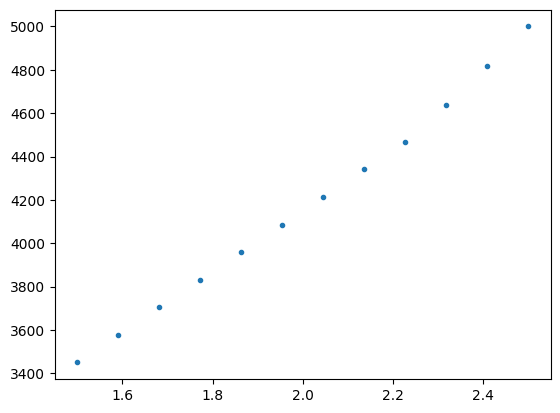

In [53]:
plt.plot(coeficientes_tomate, lucros_otimos, '.')

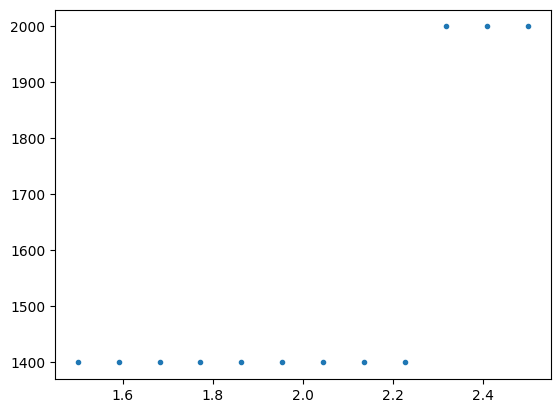

In [54]:
plt.plot(coeficientes_tomate, quantidades_tomate, '.')

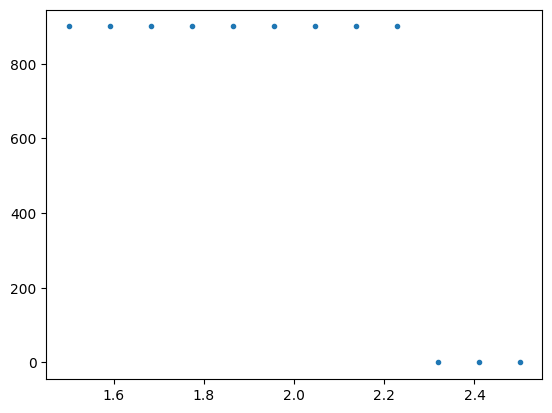

In [55]:
plt.plot(coeficientes_tomate, quantidades_alface, '.')